In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
%matplotlib inline

In [18]:
!pwd

/home/rohan/Downloads/kaggle pycon 2015 tutorial/code


In [19]:
train=pd.read_csv('../train.csv',index_col=0)
train.head(2)

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,6046168,05/18/2011 14:14:05,543315,09/17/2010 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,NaN,NaN,NaN,NaN,NaN,1
1,4873911,02/02/2011 11:30:10,465076,10/03/2010 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,xsd,jaxp,NaN,NaN,NaN,1


(array([ 35636.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  28692.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

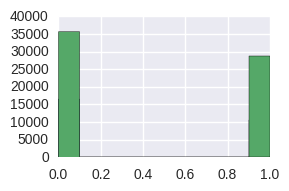

In [20]:
nan2=train[pd.isnull(train['Tag2'])]
nan3=train[pd.isnull(train['Tag3'])]
plt.figure(1)
plt.subplot(222)
plt.hist(nan2['OpenStatus'])
# plt.axis([0,1,0,18000])
# plt.subplot(211)
plt.hist(nan3['OpenStatus'])

In [21]:
train['Tag2nan']=pd.isnull(train['Tag2'])*1
train['Tag3nan']=pd.isnull(train['Tag3'])*1

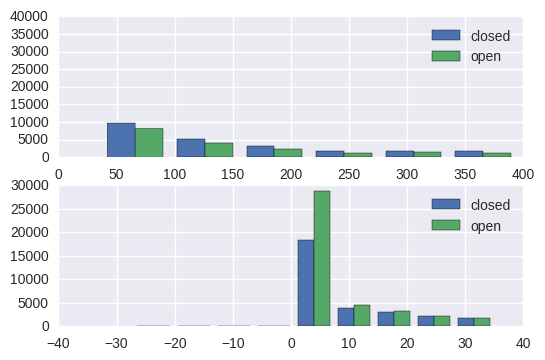

In [22]:
upper_rep=train.ReputationAtPostCreation[train.ReputationAtPostCreation>35]
lower_rep=train.ReputationAtPostCreation[train.ReputationAtPostCreation<=35]
plt.subplot(211)
plt.hist([upper_rep[train.OpenStatus==1],upper_rep[train.OpenStatus==0]],3500,label=['closed','open'])
plt.axis([0,400,0,40000])
plt.legend()
plt.subplot(212)
plt.hist([lower_rep[train.OpenStatus==1],lower_rep[train.OpenStatus==0]],label=['closed','open'])
plt.legend()

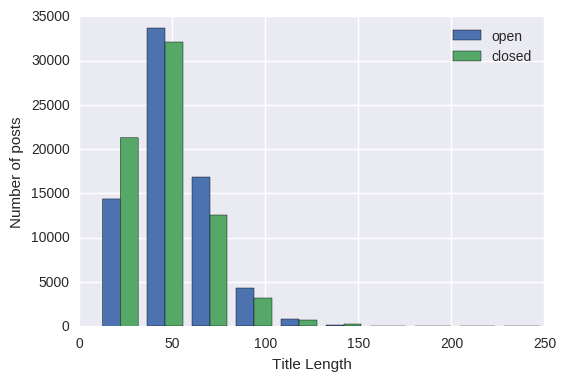

In [23]:
plt.hist([train.Title[train.OpenStatus==1].apply(len),train.Title[train.OpenStatus==0].apply(len)],label=['open','closed'])
plt.legend()
plt.xlabel('Title Length')
plt.ylabel('Number of posts')
plt.show()

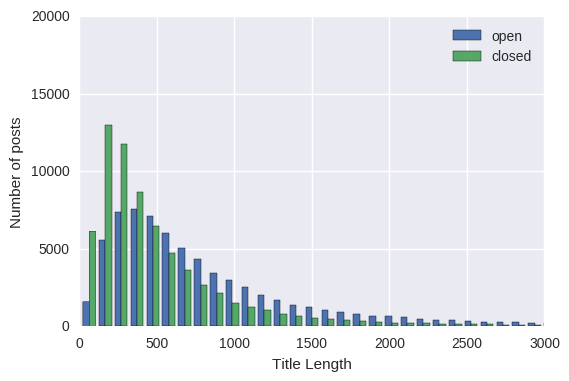

In [24]:
plt.hist([train.BodyMarkdown[train.OpenStatus==1].apply(len),train.BodyMarkdown[train.OpenStatus==0].apply(len)],300,label=['open','closed'])
plt.axis([0,3000,0,20000])
plt.legend()
plt.xlabel('Title Length')
plt.ylabel('Number of posts')
plt.show()

In [25]:
train['TitleLength']=train.Title.apply(len)
train['BodyLength']=train.BodyMarkdown.apply(len)

In [26]:
train['UpperRep']=upper_rep
train['LowerRep']=lower_rep

In [27]:
!pwd

/home/rohan/Downloads/kaggle pycon 2015 tutorial/code


In [28]:
%run feature_extractor.py

In [29]:
train=load_feature_matrix('../train.csv')
test=load_feature_matrix('../public_leaderboard.csv')

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [31]:
cols=['ReputationAtPostCreation','TitleLength','BodyLength','Tag2nan','Tag3nan']
model.fit(X=np.asarray(train[cols]),y=np.asarray(train['OpenStatus']))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
model.predict(np.asarray(train[cols]))

array([0, 1, 0, ..., 0, 0, 1])

In [33]:
predictions=model.predict_proba(np.asarray(test[cols]))
predictions=predictions[:,1]
submission=pd.DataFrame({'id':test.PostId,'OpenStatus':predictions})
submission.to_csv('../third_submission.csv',index=False)

In [34]:
!head ../first_submission.csv

OpenStatus,id
0.461357774774,11768878
0.487264880567,11768880
0.536357099592,11803678
0.46441184373,11803496
0.467468291831,11803700
0.430168707049,11927241
0.595125946883,11927226
0.46352233513,11927247
0.459730610195,11927248


In [147]:
# Tags1

open_tags=train.Tag1[train['OpenStatus']==1].value_counts()
open_tags=open_tags[open_tags>500]
closed_tags=train.Tag1[train['OpenStatus']==0].value_counts()
closed_tags=closed_tags[closed_tags>500]

NameError: name 'open_tags' is not defined

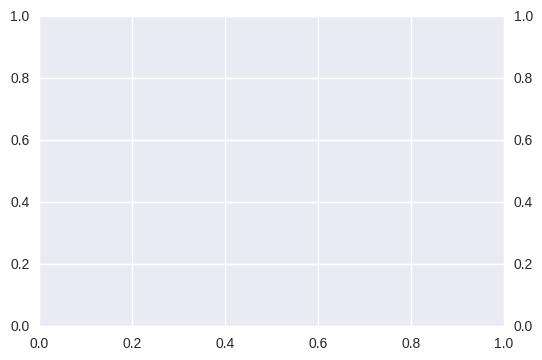

In [35]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax2=ax.twinx()
ot=open_tags.plot(kind='bar',color='blue',ax=ax,position=1,label='open',alpha=0.5,ylim=(0,8000))
ct=closed_tags.plot(kind='bar',color='red',ax=ax2,position=2,label='closed',alpha=0.5,ylim=(0,8000))
ol=mpatches.Patch(color='blue',label='open')
cl=mpatches.Patch(color='red',label='closed')
plt.legend(handles=[ol,cl])
plt.show()